# Set Up

## 1. Reading Dataset

In [1]:
#List of libraries needed to run the following code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from itertools import combinations

In [2]:
# Reading the dataset
link = "https://raw.githubusercontent.com/Vasili-28/Data-Science-Assignment/refs/heads/main/Supplementary_Data_Togashi_FINAL.csv"
tog = pd.read_csv(link)

# Displaying part of the dataset for confirmation
print(tog.head())

      CLASS             SPECIES_FINAL  STRAIN SOURCE_FINAL  \
0     fungi  acanthohelicospora aurea     NaN           SF   
1     fungi  acrostalagmus luteoalbus     NaN           SF   
2     fungi  albonectria rigidiuscula     NaN           SF   
3     fungi  albonectria rigidiuscula     NaN           SF   
4  oomycete            albugo candida  radish  SF/MB - LEG   

                                        AUTHOR_FINAL NONSYNOM_REM  \
0                (Corda) Rossman & W.C. Allen (2016)          NaN   
1             (Link) Zare, W. Gams & Schroers (2004)          NaN   
2          (Berk. & Broome) Rossman & Samuels (1999)          NaN   
3          (Berk. & Broome) Rossman & Samuels (1999)          NaN   
4  (Pers. ex J.F. Gmel.) Roussel / (Pers. ex J.F....          NaN   

  NONSYNOM_ALT NONSYNOM_REC  \
0          NaN          NaN   
1          NaN          NaN   
2          NaN          NaN   
3          NaN          NaN   
4          NaN          NaN   

                         

## 2. Scrubbing the Data

In [3]:
# Scrubbing the dataset to only include fusarium species in the variable SPECIES_FINAL, 
# remove unnecessary, rename varaibles as well as samples, and remove missing values

# Make 'fusarium' a distinct word to extract the right samples
# Excludes bisifusarium
fusarium_only_tog = tog[
    tog['SPECIES_FINAL'].str.contains(r'\bfusarium\b', case=False, na=False)  # Match "fusarium" as a distinct word
    & ~tog['SPECIES_FINAL'].str.contains('bisifusarium', case=False, na=False)  # Exclude "bisifusarium"
]

# Keep only 4 variables from the dataset and getting rid of unnecessary variables
filtered_fusarium_only_tog = fusarium_only_tog[['SPECIES_FINAL', 'PROCESS', 'CARDINAL', 'TEMPERATURE']]

# Remove missing values from the temperature variable
filtered_fusarium_only_tog = filtered_fusarium_only_tog.dropna(subset=['TEMPERATURE'])

# Rename variables
filtered_fusarium_only_tog = filtered_fusarium_only_tog.rename(columns={
    'CARDINAL': 'Cardinal',
    'TEMPERATURE': 'Temperature',
    'SPECIES_FINAL': 'Species',
    'PROCESS': 'Process',

})

# Define a function to capitlaize the first letter of 'Fusarium'
def fusarium_species_name(name):
    parts = name.split()  # Split species into words
    if parts[0].lower() == 'fusarium':
        parts[0] = 'Fusarium'  # Capitalize "Fusarium"
    return ' '.join(parts)

# Applied the newly defined function to the new dataset
filtered_fusarium_only_tog['Species'] = filtered_fusarium_only_tog['Species'].apply(fusarium_species_name)

# Preview the scrubbed dataset
print(filtered_fusarium_only_tog)

                       Species              Process Cardinal  Temperature
2135       Fusarium acuminatum  disease development      min        20.00
2136       Fusarium acuminatum  disease development      opt        24.00
2137       Fusarium acuminatum    growth in culture      max        37.50
2138       Fusarium acuminatum    growth in culture      max        35.75
2139       Fusarium acuminatum    growth in culture      max        36.00
...                        ...                  ...      ...          ...
3670       Fusarium tricinctum    growth in culture      opt        22.50
3671       Fusarium tricinctum    growth in culture      opt        22.50
3672       Fusarium tricinctum            infection      opt        20.00
3673  Fusarium verticillioides    growth in culture      min         9.00
3674  Fusarium verticillioides    growth in culture      opt        30.00

[1540 rows x 4 columns]


In [4]:
# Created new csv file for the new scrubbed dataset
filtered_fusarium_only_tog.to_csv('filtered_fusarium_species.csv', index=False)

# Analysis

##  Part 1

In [5]:
# Reading new file created
tog_final = pd.read_csv('filtered_fusarium_species.csv')

In [6]:
# Part 1 of the analysis is to summuraize the cardinal temperatures of fusarium species through doing a pivot table

# Create a table for the mean cardinal temperatures of different fusarium species
cardinal_table = tog_final.pivot_table(
    index='Species', 
    columns='Cardinal', 
    values='Temperature', 
    aggfunc='mean'  
)

# Drop rows that contain missing values from cardinal temperatures
cardinal_table_final = cardinal_table.dropna()

# Preview of the table
print(cardinal_table_final)

Cardinal                                     max        min        opt
Species                                                               
Fusarium acuminatum                    35.571429   7.571429  22.750000
Fusarium anguioides                    29.000000   4.000000  17.750000
Fusarium annuum                        37.000000  17.000000  29.000000
Fusarium arthrosporioides              33.000000   3.000000  20.500000
Fusarium avenaceum                     35.227273   3.450000  23.571429
Fusarium caeruleum                     34.312500   5.250000  19.375000
Fusarium callistephi                   32.000000  17.000000  22.500000
Fusarium culmorum                      32.984783   5.673913  25.364286
Fusarium fujikuroi                     35.827586   8.205357  29.054054
Fusarium gibbosum                      36.625000   6.800000  28.000000
Fusarium graminearum                   32.490196   6.904762  24.232143
Fusarium graminum                      35.166667   5.000000  34.000000
Fusari

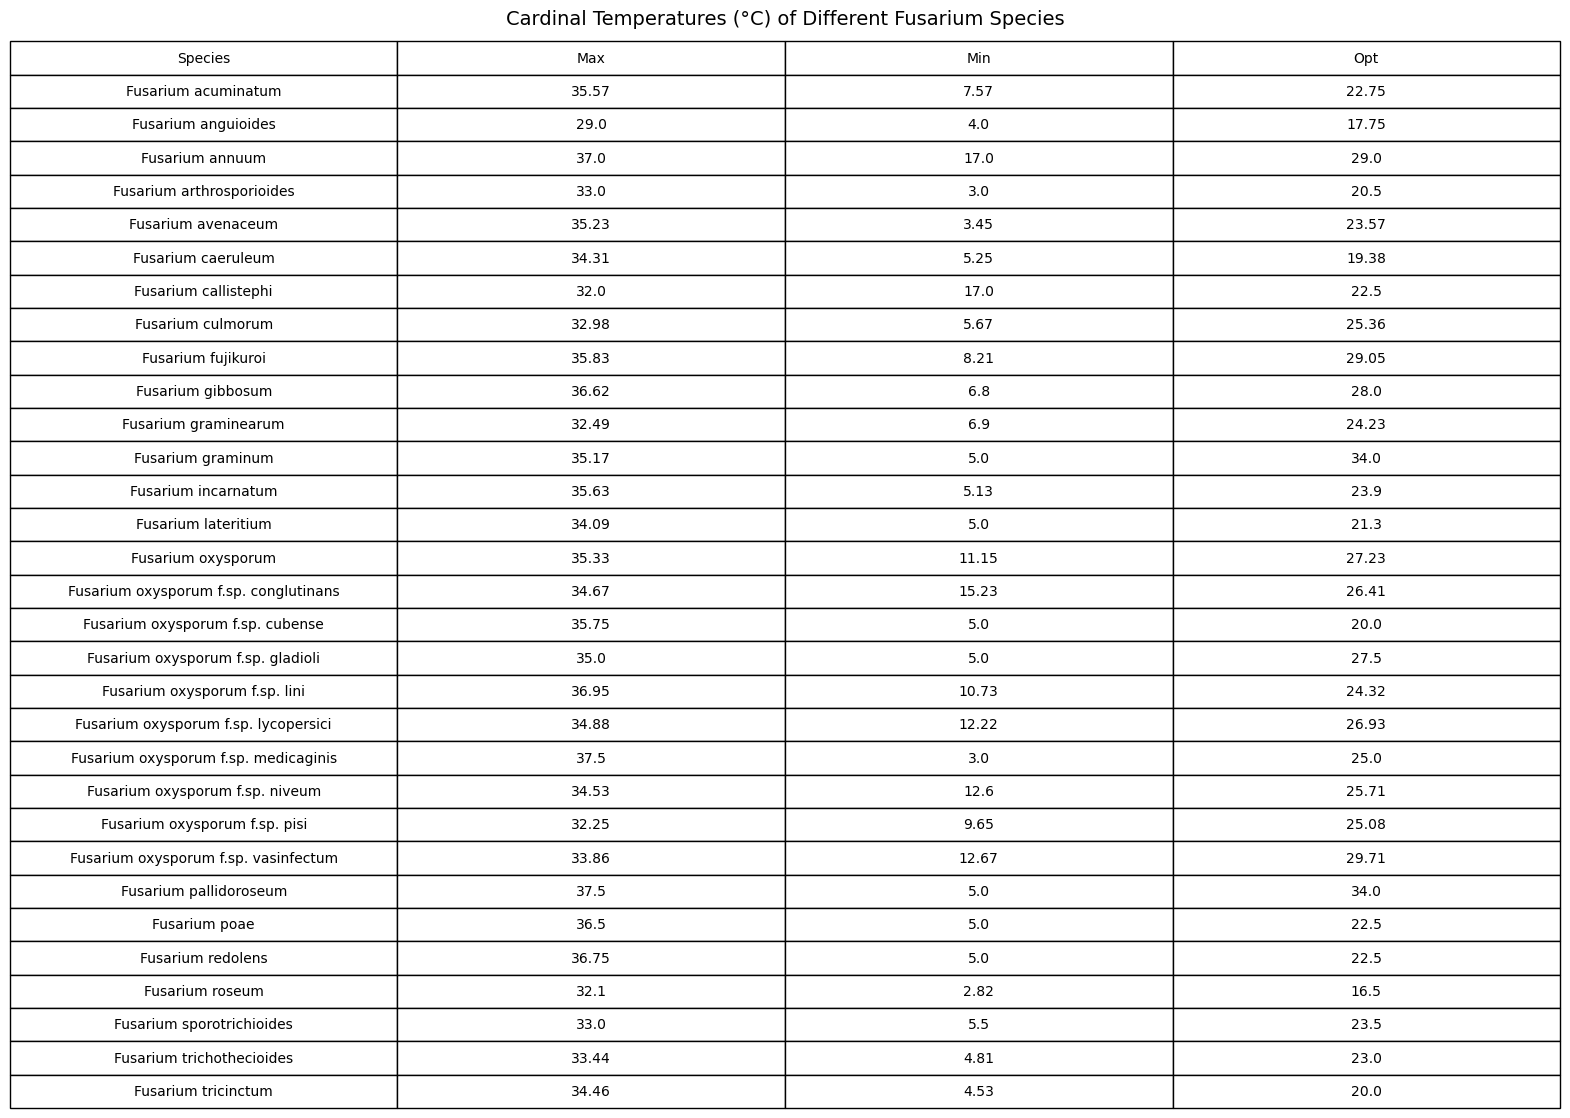

In [7]:
# Created a proper table image

# Reset the index and turn the table into a plotable format
cardinal_table_reset = cardinal_table_final.reset_index()

# Set values to two decimal places
cardinal_table_reset = cardinal_table_reset.round(2)

# Capitaliz max, min, and opt
cardinal_table_reset.columns = cardinal_table_reset.columns.str.capitalize()

# Change figure size
fig, ax = plt.subplots(figsize=(10, 6))  
ax.axis('off')  

# Plot the table
table = ax.table(
    cellText=cardinal_table_reset.values,
    colLabels=cardinal_table_reset.columns,
    loc='center',
    cellLoc='center'
)

# Edit the font and size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)  

# Add a title 
plt.title('Cardinal Temperatures (°C) of Different Fusarium Species', fontsize=14, pad=230) 

# Save the table as a .png 
plt.savefig('cardinal_table_reset.png', bbox_inches='tight', dpi=300) 

# Preview of the table
plt.show()


In [8]:
# See desrciptive statistcs of the cardinal temperatures for all Fusarium species

summary_statistics = cardinal_table_final.describe()

# Display the statistics
print("Summary Statistics:\n")
print(summary_statistics)

Summary Statistics:

Cardinal        max        min        opt
count     31.000000  31.000000  31.000000
mean      34.625805   7.416118  24.553959
std        1.924338   4.137951   4.130047
min       29.000000   2.818182  16.500000
25%       33.218750   5.000000  22.500000
50%       34.880952   5.250000  24.232143
75%       35.788793  10.189706  27.076716
max       37.500000  17.000000  34.000000


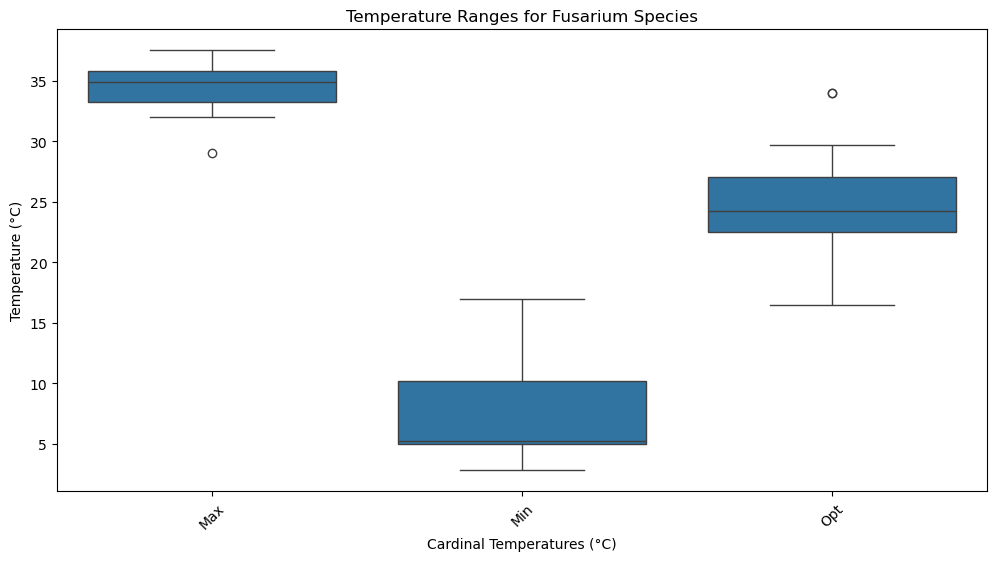

In [9]:
# Created a box plot to illustrate the cardinal temeprature of Fusarium species

# Reset the index so 'SPECIES_FINAL' becomes a column again
cardinal_pivot_final_bar = cardinal_table_final.reset_index()

# Melt the DataFrame for easier visualization
boxplot_data = cardinal_pivot_final_bar.melt(
    id_vars=['Species'],  # Keep species as identifier
    value_vars=['max', 'min', 'opt'],  # Variables to unpivot
    var_name='Temperature Type',  # Name of the new variable column
    value_name='Temperature'  # Name of the new value column
)
#Capitlize cardinal temperatures first letter
boxplot_data['Temperature Type'] = boxplot_data['Temperature Type'].str.capitalize()

# Create the box plot and save it into the working directory
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, x='Temperature Type', y='Temperature')
plt.title('Temperature Ranges for Fusarium Species')
plt.xlabel('Cardinal Temperatures (°C)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.savefig('box_plot.png', bbox_inches='tight', dpi=300)  
plt.show()

## Part 2

In [11]:
# Descriptive statiscts for temperatures amongst various processes
summary_by_process = tog_final.groupby('Process')['Temperature'].describe()

# Display the results
print("Summary by Process:")
print(summary_by_process)


Summary by Process:
                      count       mean        std   min     25%   50%   75%  \
Process                                                                       
disease development   250.0  22.856000   9.059601   0.0  16.925  24.0  30.0   
fructification         18.0  23.194444   9.745495   4.0  20.000  26.0  27.5   
growth in culture    1006.0  22.600994  12.998176 -10.0   7.000  26.0  35.0   
infection             217.0  23.674654   8.702253   0.0  17.000  25.0  30.5   
spore germination      39.0  23.974359  11.883729   4.0   9.750  30.0  32.0   
sporulation            10.0  21.350000  10.437779   5.0  14.000  24.0  31.0   

                      max  
Process                    
disease development  38.0  
fructification       37.0  
growth in culture    40.0  
infection            39.0  
spore germination    40.0  
sporulation          33.0  


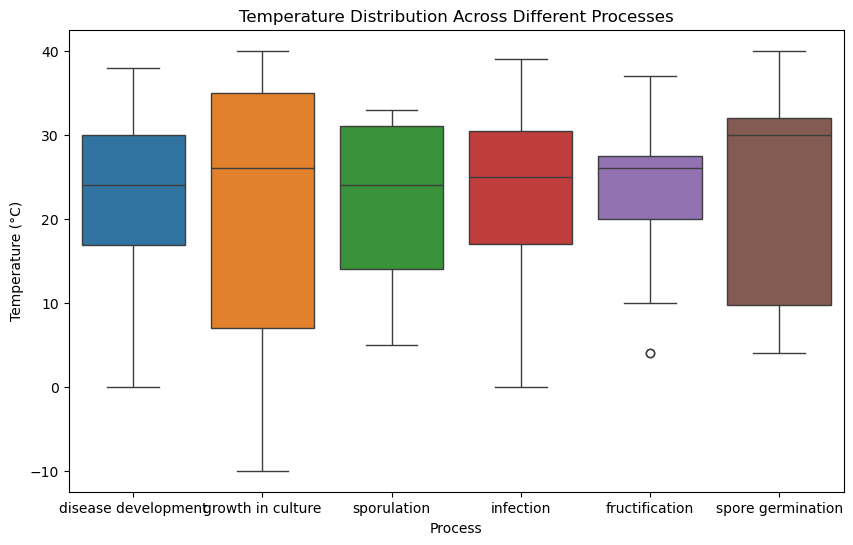

In [12]:
# Determine if there is an asosciation between life process and temperature in all Fusarium species

# Create a boxplot to compare temperature across different processes 
plt.figure(figsize=(10, 6))
sns.boxplot(data=tog_final, x='Process', y='Temperature', hue='Process')

# Create the box plot
plt.title('Temperature Distribution Across Different Processes')
plt.xlabel('Process')
plt.ylabel('Temperature (°C)')
plt.savefig('box_plot2.png', bbox_inches='tight', dpi=300)
plt.show()

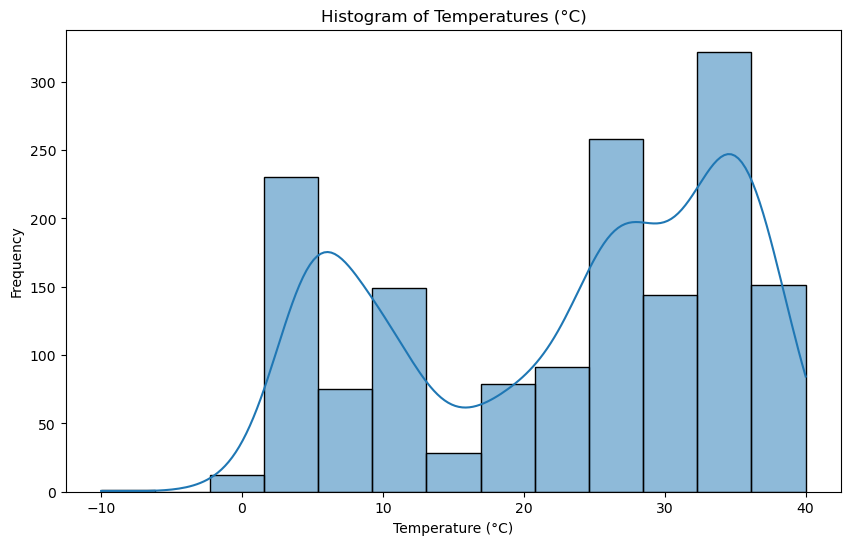

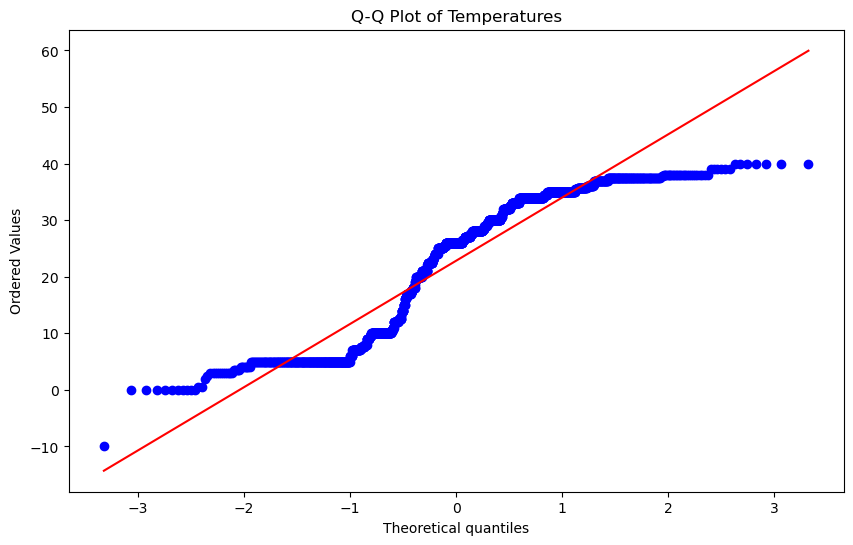

In [13]:
# Checked the assumptions to pick between parametric or non-parametric testing
# Plotting histogram to determine normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(tog_final['Temperature'], kde=True)
plt.title('Histogram of Temperatures (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Plotting Q-Q plot to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(tog_final['Temperature'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Temperatures')
plt.show()

In [14]:
# Extract data for each process group
process_data = [tog_final[tog_final['Process'] == group]['Temperature'].dropna() for group in tog_final['Process'].unique()]

# Perform the Kruskal-Wallis H test (non-parametric)
stat, p_value = kruskal(*process_data)

# Display results
print(f"Kruskal-Wallis H Statistic: {stat}")
print(f"P-value: {p_value}")


Kruskal-Wallis H Statistic: 3.1590363488303703
P-value: 0.6754823335300745


## Optional

In [15]:
# This code is for a pairwise comparison if needed depending on your dataset/results
# Define your processes 
processes = tog_final['Process'].unique()

# Create a data frame to store results
results = []

# Conduct pairwise Mann-Whitney U tests
# Created a loop for each processes to be compared to one another
for process_1, process_2 in combinations(processes, 2):
    data_1 = tog_final[tog_final['Process'] == process_1]['Temperature'].dropna()
    data_2 = tog_final[tog_final['Process'] == process_2]['Temperature'].dropna()
    
    # Conduct test
    stat, p_value = mannwhitneyu(data_1, data_2)
    
    # Store the results
    results.append({
        'Process 1': process_1,
        'Process 2': process_2,
        'U Statistic': stat,
        'P-value': p_value
    })

# Convert results to a data frame for viewing
results_tog = pd.DataFrame(results)

# Display stats results
print(results_tog)


              Process 1          Process 2  U Statistic   P-value
0   disease development  growth in culture     118755.5  0.171774
1   disease development        sporulation       1356.0  0.650707
2   disease development          infection      25823.0  0.370499
3   disease development     fructification       2193.0  0.858699
4   disease development  spore germination       4349.5  0.279029
5     growth in culture        sporulation       5686.0  0.475608
6     growth in culture          infection     111597.5  0.603106
7     growth in culture     fructification       9777.0  0.559411
8     growth in culture  spore germination      18603.5  0.582117
9           sporulation          infection        938.0  0.470211
10          sporulation     fructification         80.0  0.647902
11          sporulation  spore germination        170.0  0.542380
12            infection     fructification       1990.5  0.893703
13            infection  spore germination       3965.0  0.531711
14       f